In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path='/Users/danielbabin/Documents/GitHub/Zircon_Standards/Results/Test2/'
figure_path='/Users/danielbabin/Documents/GitHub/Zircon_Standards/Figures/'

In [3]:
basic=pd.read_csv(data_path+'results_basic.txt',sep='\t')
basic.rename(columns={'Unnamed: 0':'Kind'},inplace=True)
kind=pd.DataFrame(basic['Kind'].ffill())
basic=basic.iloc[:,1:].dropna(axis=0,how='all')
basic=pd.concat([kind.loc[basic.index],basic],sort=False,axis=1)
basic.set_index('Kind',inplace=True)

In [4]:
prop=pd.read_csv(data_path+'results_propogated.txt',sep='\t')
prop.rename(columns={'Unnamed: 0':'Kind'},inplace=True)
kind=pd.DataFrame(prop['Kind'].ffill())
prop=prop.iloc[:,1:].dropna(axis=0,how='all')
prop=pd.concat([kind.loc[prop.index],prop],sort=False,axis=1)
prop.set_index('Kind',inplace=True)

In [5]:
print(prop.columns[:100])

Index(['Start time', 'End time', '% Discordance_mean',
       '% Discordance_2SE(int)', '% Discordance_NoOfPoints', 'Pb206_CPS_mean',
       'Pb206_CPS_2SE(int)', 'Pb206_CPS_NoOfPoints', 'Pb207_CPS_mean',
       'Pb207_CPS_2SE(int)', 'Pb207_CPS_NoOfPoints', 'Pb208_CPS_mean',
       'Pb208_CPS_2SE(int)', 'Pb208_CPS_NoOfPoints', 'U238_CPS_mean',
       'U238_CPS_2SE(int)', 'U238_CPS_NoOfPoints', 'TotalBeam_CPS_mean',
       'TotalBeam_CPS_2SE(int)', 'TotalBeam_CPS_NoOfPoints',
       'Final Pb206/U238_mean', 'Final Pb206/U238_2SE(prop)',
       'Final Pb206/U238_NoOfPoints', 'Final Pb206/U238 age_mean',
       'Final Pb206/U238 age_2SE(prop)', 'Final Pb206/U238 age_NoOfPoints',
       'Final Pb207/U235_mean', 'Final Pb207/U235_2SE(prop)',
       'Final Pb207/U235_NoOfPoints', 'Final Pb207/U235 age_mean',
       'Final Pb207/U235 age_2SE(prop)', 'Final Pb207/U235 age_NoOfPoints',
       'Final Pb207/Pb206_mean', 'Final Pb207/Pb206_2SE(prop)',
       'Final Pb207/Pb206_NoOfPoints', 'Final 

In [6]:
print(prop.columns[100:])

Index([], dtype='object')


In [7]:
zircons=basic.index.unique()[-9:].to_list()

# Percent Error Internal vs Propogated Figure

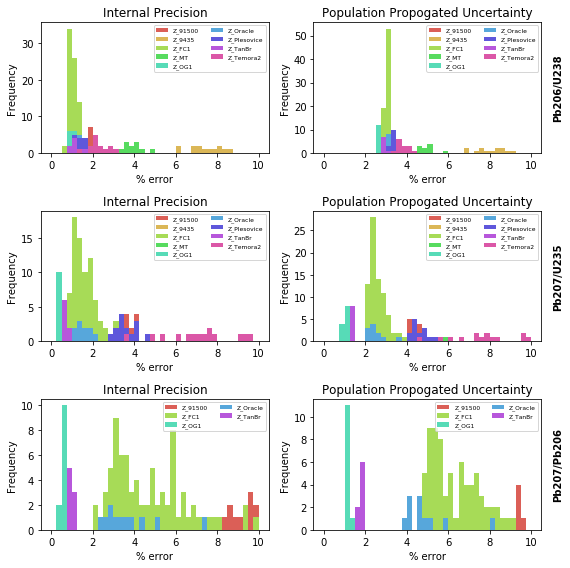

In [8]:
xbins=np.linspace(0,10,41)
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(8,8))
ratios=['Pb206/U238','Pb207/U235','Pb207/Pb206']
colors=sns.color_palette('hls',9)
for i,rat in enumerate(ratios):
    for k,z in enumerate(zircons[0:9]):
        if (
            ((z=='Z_9435')&(rat=='Pb207/Pb206'))|
            ((z=='Z_MT')&(rat=='Pb207/Pb206'))|
            ((z=='Z_Plesovice')&(rat=='Pb207/Pb206'))|
            ((z=='Z_Temora2')&(rat=='Pb207/Pb206'))
        ):
            fart=1
        else:
            (basic.loc[z,'Final '+rat+' age_2SE(int)']/
             basic.loc[z,'Final '+rat+' age_mean']*100).plot(kind='hist',label=z,histtype='barstacked',
                                                               bins=xbins,ax=axes[i,0],color=colors[k])
            (prop.loc[z,'Final '+rat+' age_2SE(prop)']/
             prop.loc[z,'Final '+rat+' age_mean']*100).plot(kind='hist',label=z,histtype='barstacked',
                                                               bins=xbins,ax=axes[i,1],color=colors[k])
    axes[i,0].legend(ncol=2,fontsize=6)
    axes[i,0].set_title('Internal Precision')
    axes[i,0].set_xlabel('% error')


    axes[i,1].legend(ncol=2,fontsize=6)
    axes[i,1].set_title('Population Propogated Uncertainty')
    axes[i,1].set_xlabel('% error')
    
    axes[i,1].annotate(rat,xy=(1.05,.5),xycoords='axes fraction',rotation=90,
                       verticalalignment='center',horizontalalignment='left',fontweight='bold')

plt.tight_layout()
fig.savefig(figure_path+'Test2-internal&propogatedUncertainty.png',dpi=300)

# Error Tables

In [9]:
_68cols={'int':['Final Pb206/U238 age_mean','Final Pb206/U238 age_2SE(int)'],
         'prop':['Final Pb206/U238 age_mean','Final Pb206/U238 age_2SE(prop)']}
_75cols={'int':['Final Pb207/U235 age_mean','Final Pb207/U235 age_2SE(int)'],
         'prop':['Final Pb207/U235 age_mean','Final Pb207/U235 age_2SE(prop)']}
_76cols={'int':['Final Pb207/Pb206 age_mean', 'Final Pb207/Pb206 age_2SE(int)'],
         'prop':['Final Pb207/Pb206 age_mean', 'Final Pb207/Pb206 age_2SE(prop)']}
collists={68:_68cols,75:_75cols,76:_76cols}
accepted_ages=[1065,55,1099,731,3465,1436,337,2514,417]

In [10]:
col=collists[75]['prop'][0]

In [11]:
basic.loc[zircons,col].groupby(by=basic.loc[zircons,col].index).mean()

Kind
Z_91500        1067.994261
Z_9435           68.861143
Z_FC1          1096.826292
Z_MT            695.472691
Z_OG1          3427.155359
Z_Oracle       1423.205336
Z_Plesovice     338.724925
Z_TanBr        2473.172023
Z_Temora2       414.514442
Name: Final Pb207/U235 age_mean, dtype: float64

In [12]:
results={}
for key in collists.keys():
    sAge=basic.loc[zircons,collists[key]['int'][0]]
    sInt=basic.loc[zircons,collists[key]['int'][1]]
    sProp=prop.loc[zircons,collists[key]['prop'][1]]

    gbAge=sAge.groupby(sAge.index)
    meanAge=gbAge.mean()
    _2sErrPopulation=(gbAge.std().div(gbAge.size()**.5,axis=0)*2).rename('Population 2SE (absolute)')

    meanPrecision=pd.concat([sInt.groupby(by=sInt.index).mean(),sProp.groupby(by=sProp.index).mean()],axis=1)

    df=pd.concat([meanAge,_2sErrPopulation,meanPrecision],axis=1)
    newColNames=['Mean Measured Age (Ma)','Population 2SE (abolute)',
                 'Average 2SE Internal (absolute)','Average 2SE Propogated (absolute)']
    percErrColNames=['Population 2SE (%)',
                     'Average 2SE Internal (%)','Average 2SE Propogated (%)']
    for i,col in enumerate(df.columns):
        df.rename(columns={col:newColNames[i]},inplace=True)
    for i,col in enumerate(df.columns[1:]):
        df[percErrColNames[i]]=df[col].div(df['Mean Measured Age (Ma)'],axis=0)*100
    df['Accepted Age (Ma)']=accepted_ages
    df=df[['Accepted Age (Ma)','Mean Measured Age (Ma)',
          'Population 2SE (abolute)','Population 2SE (%)',
          'Average 2SE Internal (absolute)','Average 2SE Internal (%)',
          'Average 2SE Propogated (absolute)','Average 2SE Propogated (%)']]
    if key==76:
        df.drop(['Z_9435','Z_MT','Z_Plesovice','Z_Temora2'],inplace=True)
    results[key]=df.round(2)

In [13]:
print('206Pb/238U Results')
results[68]

206Pb/238U Results


,Accepted Age (Ma),Mean Measured Age (Ma),Population 2SE (abolute),Population 2SE (%),Average 2SE Internal (absolute),Average 2SE Internal (%),Average 2SE Propogated (absolute),Average 2SE Propogated (%)
Kind,,,,,,,,
Z_91500,1065,1065.45,8.70,0.82,20.12,1.89,36.72,3.45
Z_9435,55,54.25,1.53,2.82,4.16,7.67,4.50,8.29
Z_FC1,1099,1113.92,1.94,0.17,11.71,1.05,34.25,3.07
Z_MT,731,698.36,10.29,1.47,26.15,3.74,33.68,4.82
Z_OG1,3465,3415.31,24.41,0.71,34.00,1.00,89.50,2.62
Z_Oracle,1436,1422.20,16.15,1.14,20.33,1.43,44.89,3.16
Z_Plesovice,337,338.07,2.75,0.81,4.80,1.42,11.41,3.37
Z_TanBr,2514,2466.47,22.28,0.90,28.70,1.16,70.36,2.85
Z_Temora2,417,405.39,4.85,1.20,9.32,2.30,15.49,3.82


In [14]:
print('207Pb/235U Results')
results[75]

207Pb/235U Results


,Accepted Age (Ma),Mean Measured Age (Ma),Population 2SE (abolute),Population 2SE (%),Average 2SE Internal (absolute),Average 2SE Internal (%),Average 2SE Propogated (absolute),Average 2SE Propogated (%)
Kind,,,,,,,,
Z_91500,1065,1067.99,12.10,1.13,39.75,3.72,45.45,4.26
Z_9435,55,68.86,4.86,7.05,22.24,32.30,22.35,32.46
Z_FC1,1099,1096.83,1.78,0.16,17.46,1.59,28.39,2.59
Z_MT,731,695.47,16.57,2.38,88.73,12.76,90.66,13.04
Z_OG1,3465,3427.16,9.22,0.27,14.49,0.42,34.92,1.02
Z_Oracle,1436,1423.21,16.03,1.13,23.91,1.68,35.45,2.49
Z_Plesovice,337,338.72,4.02,1.19,12.35,3.64,15.62,4.61
Z_TanBr,2514,2473.17,10.42,0.42,16.29,0.66,34.63,1.40
Z_Temora2,417,414.51,6.85,1.65,29.40,7.09,31.62,7.63


In [15]:
print('207Pb/206Pb Results')
results[76]

207Pb/206Pb Results


,Accepted Age (Ma),Mean Measured Age (Ma),Population 2SE (abolute),Population 2SE (%),Average 2SE Internal (absolute),Average 2SE Internal (%),Average 2SE Propogated (absolute),Average 2SE Propogated (%)
Kind,,,,,,,,
Z_91500,1065,1125.57,33.63,2.99,105.93,9.41,114.41,10.16
Z_FC1,1099,1086.72,5.09,0.47,50.70,4.67,69.64,6.41
Z_OG1,3465,3456.14,8.48,0.25,19.13,0.55,40.66,1.18
Z_Oracle,1436,1443.42,25.56,1.77,54.69,3.79,70.92,4.91
Z_TanBr,2514,2503.99,12.86,0.51,24.02,0.96,45.81,1.83


In [16]:
results={}
for key in collists.keys():
    sAge=basic.loc[zircons,collists[key]['int'][0]]
    sInt=basic.loc[zircons,collists[key]['int'][1]]
    sProp=prop.loc[zircons,collists[key]['prop'][1]]

    gbAge=sAge.groupby(sAge.index)
    meanAge=gbAge.mean()
    _2sErrPopulation=(gbAge.std().div(gbAge.size()**.5,axis=0)*2).rename('Population 2SE (absolute)')

    meanPrecision=pd.concat([sInt.groupby(by=sInt.index).mean(),sProp.groupby(by=sProp.index).mean()],axis=1)

    df=pd.concat([meanAge,_2sErrPopulation,meanPrecision],axis=1)
    newColNames=['Mean Measured Age (Ma)','Population 2SE (abolute)',
                 'Average 2SE Internal (absolute)','Average 2SE Propogated (absolute)']
    percErrColNames=['Population 2SE (%)',
                     'Average 2SE Internal (%)','Average 2SE Propogated (%)']
    for i,col in enumerate(df.columns):
        df.rename(columns={col:newColNames[i]},inplace=True)
    for i,col in enumerate(df.columns[1:]):
        df[percErrColNames[i]]=df[col].div(df['Mean Measured Age (Ma)'],axis=0)*100
    df['Accepted Age (Ma)']=accepted_ages
    df=df[['Accepted Age (Ma)','Mean Measured Age (Ma)',
          'Population 2SE (abolute)','Population 2SE (%)',
          'Average 2SE Internal (absolute)','Average 2SE Internal (%)',
          'Average 2SE Propogated (absolute)','Average 2SE Propogated (%)']]
    if key==76:
        df.drop(['Z_9435','Z_MT','Z_Plesovice','Z_Temora2'],inplace=True)
    results[key]=df.round(2)

In [17]:
_68s=['Z_9435','Z_Plesovice','Z_Temora2','Z_91500','Z_FC1','Z_Oracle']
_76s=['Z_TanBr','Z_OG1']
accepted_ages_68=[55,337,417,1065,1099,1436]
accepted_ages_76=[2514,3465]

In [18]:
bestages=pd.DataFrame()
for i,z in enumerate(_68s):
    measurements=basic.loc[z,collists[68]['int']]
    measurements['Accepted Age (Ma)']=accepted_ages_68[0]
    measurements.rename(columns={measurements.columns[0]:'Measured Age (Ma)',
                       measurements.columns[1]:'Uncertainty 2SE(int)'},inplace=True)
    measurements['Weights']=1/measurements['Uncertainty 2SE(int)']**2
    n=len(measurements)
    accepted_age=accepted_ages_68[i]
    w_mean=(measurements['Weights']*measurements['Measured Age (Ma)']).sum()/measurements['Weights'].sum()
    perc2se=measurements['Measured Age (Ma)'].std()*2/w_mean*100/n**.5
    perc2std=measurements['Measured Age (Ma)'].std()*2/w_mean*100
    df=pd.DataFrame({'Measured Age (Ma)':w_mean,
                     'Population 2SE (%)':perc2se,
                     'Population 2SD (%)':perc2std,
                     'Accepted Age (Ma)':accepted_age,
                     'n':n},index=[z])
    bestages=bestages.append(df)
for i,z in enumerate(_76s):
    measurements=basic.loc[z,collists[76]['int']]
    measurements['Accepted Age (Ma)']=accepted_ages_68[0]
    measurements.rename(columns={measurements.columns[0]:'Measured Age (Ma)',
                       measurements.columns[1]:'Uncertainty 2SE(int)'},inplace=True)
    measurements['Weights']=1/measurements['Uncertainty 2SE(int)']**2
    n=len(measurements)
    accepted_age=accepted_ages_76[i]
    w_mean=(measurements['Weights']*measurements['Measured Age (Ma)']).sum()/measurements['Weights'].sum()
    perc2se=measurements['Measured Age (Ma)'].std()*2/w_mean*100/n**.5
    perc2std=measurements['Measured Age (Ma)'].std()*2/w_mean*100
    df=pd.DataFrame({'Measured Age (Ma)':w_mean,
                     'Population 2SE (%)':perc2se,
                     'Population 2SD (%)':perc2std,
                     'Accepted Age (Ma)':accepted_age,
                     'n':n},index=[z])
    bestages=bestages.append(df)
bestages['Normalized Age']=((bestages['Measured Age (Ma)']-bestages['Accepted Age (Ma)'])
                            /bestages['Accepted Age (Ma)']*100)

In [19]:
bestages

,Measured Age (Ma),Population 2SE (%),Population 2SD (%),Accepted Age (Ma),n,Normalized Age
Z_9435,53.813537,2.840343,10.627591,55,14,-2.157206
Z_Plesovice,338.021551,0.812923,3.041680,337,14,0.303131
Z_Temora2,402.899041,1.203769,4.504092,417,14,-3.381525
Z_91500,1062.204685,0.818776,3.063581,1065,14,-0.262471
Z_FC1,1113.840277,0.174288,1.529373,1099,77,1.350344
Z_Oracle,1418.784736,1.137970,3.774220,1436,11,-1.198835
Z_TanBr,2505.694269,0.513071,1.451185,2514,8,-0.330379
Z_OG1,3455.171204,0.245419,0.850155,3465,12,-0.283659


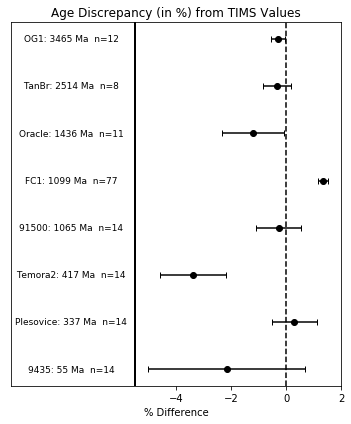

In [20]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_xlim(-10,2)
for i,z in enumerate(bestages.index):
    ax.errorbar(bestages.loc[z,'Normalized Age'],i,xerr=bestages.loc[z,'Population 2SE (%)'],
                color='k',capsize=3,marker='o')
    ax.annotate(z[2:]+': '+str(bestages.loc[z,'Accepted Age (Ma)'])+
                ' Ma  n='+str(bestages.loc[z,'n']),xy=(-7.8,i),
                horizontalalignment='center',verticalalignment='center',fontsize=9)
ax.axvline(0,ls='--',color='k')
ax.axvline(-5.5,color='k',lw=2)
ax.set_yticklabels('')
ax.set_xticks([-4,-2,0,2])
ax.yaxis.set_visible(False)
ax.set_title('Age Discrepancy (in %) from TIMS Values')
ax.set_xlabel('% Difference')
plt.tight_layout()
fig.savefig(figure_path+'AgeDiscrepancy.png',dpi=300)

# Import Digitized LaserChron Data

In [21]:
supplement_path='/Users/danielbabin/Documents/GitHub/Zircon_Standards/SupplementaryData/'

In [22]:
lc=pd.read_csv(supplement_path+'LaserChronAges.csv',header=None,names=['ID','Offset (%)'])
lc[['Sample','Mass Spec','Kind']]=lc['ID'].str.split(' ',expand=True)
lc=lc.sort_values(by=['Sample','Mass Spec']).set_index(['Sample','Mass Spec','Kind'])
lc=lc.loc[bestages.index[:-2]]['Offset (%)']
lc=lc.unstack()
lc['Offset (%)']=lc['V'].astype(float)
lc['Error (%)']=lc['E'].astype(float)-lc['V'].astype(float)
lc=lc[['Offset (%)','Error (%)']]

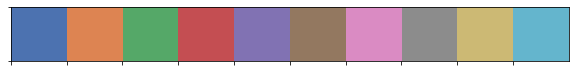

In [23]:
colors=sns.color_palette('deep')
sns.palplot(colors)

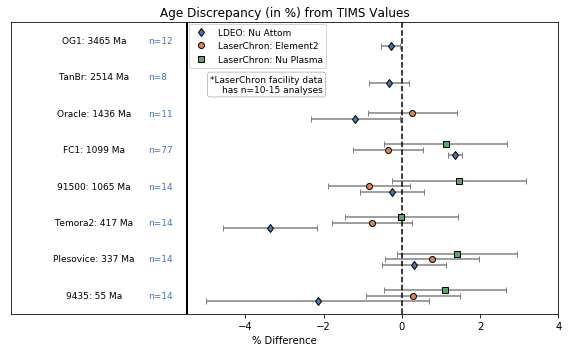

In [42]:
fig,ax=plt.subplots(figsize=(8,5))
ax.set_xlim(-10,4)
for i,z in enumerate(bestages.index):
    ax.errorbar(bestages.loc[z,'Normalized Age'],i-.15,xerr=bestages.loc[z,'Population 2SE (%)'],
                color=colors[0],capsize=3,marker='d',ecolor='grey',markeredgecolor='k')
    ax.annotate(z[2:]+': '+str(bestages.loc[z,'Accepted Age (Ma)'])+
                ' Ma  ',xy=(-7.8,i),horizontalalignment='center',verticalalignment='center',
                fontsize=9)
    ax.annotate('n='+str(bestages.loc[z,'n']),xy=(-6.5,i),horizontalalignment='left',verticalalignment='center',
                fontsize=9,color=colors[0])
    
for i,z in enumerate(bestages.index[:-2]):
    ax.errorbar(lc.loc[z,'Offset (%)'].loc['SC'],i,xerr=lc.loc[z,'Error (%)'].loc['SC'],
                color=colors[1],capsize=3,marker='o',ecolor='grey',markeredgecolor='k')
for i,z in enumerate(bestages.index[:-2].drop('Z_Temora2')):   
    ax.errorbar(lc.loc[z,'Offset (%)'].loc['MC'],i+.15,xerr=lc.loc[z,'Error (%)'].loc['MC'],
            color=colors[2],capsize=3,marker='s',ecolor='grey',markeredgecolor='k')

ax.set_ylim(-.5,7.5)

ax.axvline(0,ls='--',color='k')
ax.axvline(-5.5,color='k',lw=2)
ax.set_yticklabels('')
ax.set_xticks([-4,-2,0,2,4])

ax.yaxis.set_visible(False)
ax.set_title('Age Discrepancy (in %) from TIMS Values')
ax.set_xlabel('% Difference')
ax.annotate('*LaserChron facility data\nhas n=10-15 analyses',xy=(.57,.82),xycoords='axes fraction',
            horizontalalignment='right',verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.3', fc='None', alpha=0.3,lw=.8),size=9)

from matplotlib.lines import Line2D
ldeo=Line2D([0],[0],markerfacecolor=colors[0], marker='d',markeredgecolor='k',label='LDEO: Nu Attom',ls='')
lcsc=Line2D([0],[0],markerfacecolor=colors[1], marker='o',markeredgecolor='k',label='LaserChron: Element2',ls='')
lcmc=Line2D([0],[0],markerfacecolor=colors[2], marker='s',markeredgecolor='k',label='LaserChron: Nu Plasma',ls='')

ax.legend(handles=[ldeo,lcsc,lcmc],loc=(.325,.845),fontsize=9)

plt.tight_layout()
fig.savefig(figure_path+'AgeDiscrepancy.png',dpi=300)